# **Neural network part of Qimpact project**
**Data was proceeded and prepared for NN in Qimpact.jpynb, here's the implementation of NN itself**

In [43]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.profiler import Profiler, AdvancedProfiler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib ipympl

**Set the size of test and validation data (Rest will be used for training)**

In [2]:
validationsize=1000 #how many samples will be used as traindata
testsize=1000

**Importing already scaled data, that were created in Qimpact.jupynb**

In [21]:
scaled_Qdata = pd.read_csv('C:/Users/aleks/Projects/arameic-mishmash/Bachelor/Data/scaled_QData.csv', header=0, index_col=0)  #qdata
print(scaled_Qdata.shape)
scaled_Qdata.head()

(9731, 1353)


,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,n_263,n_264,n_265,n_266,n_267,n_268,n_269,Qimpact_c-1,Qimpact_c,Qimpact_c+1
0.003694,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,4.661122e+20,4.661157e+20,4.661192e+20,4.661227e+20,4.661262e+20,4.661298e+20,4.661333e+20,-1.063465,-1.063306,-1.063147
0.003712,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,4.661157e+20,4.661192e+20,4.661227e+20,4.661262e+20,4.661298e+20,4.661333e+20,4.661369e+20,-1.063306,-1.063147,-1.062988
0.003731,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,4.661192e+20,4.661227e+20,4.661262e+20,4.661298e+20,4.661333e+20,4.661369e+20,4.661405e+20,-1.063147,-1.062988,-1.062829
0.003750,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,4.661227e+20,4.661262e+20,4.661298e+20,4.661333e+20,4.661369e+20,4.661405e+20,4.661441e+20,-1.062988,-1.062829,-1.062670
0.003768,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,4.661262e+20,4.661298e+20,4.661333e+20,4.661369e+20,4.661405e+20,4.661441e+20,4.661477e+20,-1.062829,-1.062670,-1.062511


**Shuffling and spliting data**

In [22]:
shuffled_Qdata=scaled_Qdata.sample(n=scaled_Qdata.shape[0])

validation_data=shuffled_Qdata.iloc[:validationsize]
test_data=shuffled_Qdata.iloc[validationsize:validationsize+testsize]
train_data=shuffled_Qdata.iloc[validationsize+testsize:]

print('Training dataset size: ', train_data.shape, '\nTesting dataset size: ',test_data.shape,'\nValidation dataset size: ', validation_data.shape)

Training dataset size:  (7731, 1353) 
Testing dataset size:  (1000, 1353) 
Validation dataset size:  (1000, 1353)


In [23]:
train_data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,n_263,n_264,n_265,n_266,n_267,n_268,n_269,Qimpact_c-1,Qimpact_c,Qimpact_c+1
0.115146,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,-0.390940,...,5.151270e+20,5.151271e+20,5.151272e+20,5.151273e+20,5.151274e+20,5.151275e+20,5.151276e+20,0.242566,0.242985,0.243404
0.169581,2.859757,2.867081,2.874319,2.881469,2.888532,2.895505,2.902390,2.909184,2.915888,2.922500,...,5.307983e+21,5.307856e+21,5.308078e+21,5.308642e+21,5.309531e+21,5.310731e+21,5.312228e+21,1.373409,1.357157,1.340976
0.162625,-0.390941,-0.390941,-0.390941,-0.390941,-0.390941,-0.390941,-0.390941,-0.390941,-0.390941,-0.390941,...,1.950378e+21,1.961413e+21,1.972474e+21,1.983560e+21,1.994672e+21,2.005808e+21,2.016970e+21,2.504447,2.506950,2.509474
0.014315,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,-0.390936,...,4.697631e+20,4.697704e+20,4.697778e+20,4.697852e+20,4.697925e+20,4.697999e+20,4.698072e+20,-0.973003,-0.972842,-0.972681
0.163859,-0.340107,-0.336590,-0.332961,-0.329223,-0.325374,-0.321416,-0.317350,-0.313177,-0.308896,-0.304508,...,2.724252e+21,2.736538e+21,2.748836e+21,2.761146e+21,2.773468e+21,2.785801e+21,2.798145e+21,2.716519,2.720418,2.724334


In [24]:
target_fields = ['Qimpact_c-1', 'Qimpact_c', 'Qimpact_c+1']

train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
validation_features, validation_targets = validation_data.drop(target_fields, axis=1), validation_data[target_fields]    


In [27]:
l_rate = 0.2
mse_loss = nn.MSELoss(reduction = 'mean')

In [31]:
class Regression(pl.LightningModule):
    
### The Model ### 

    # Question: what will your model architecture look like?
    # Initialize the layers
    # Here we have one input layer (size 56 #3N as we have 56 #3N features), one hidden layer (size 10), 
    # and one output layer (size 1 as we are predicting a single value)
    def __init__(self):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(train_features.shape[1], 10) #Here I changed initial 56 size of fc1 to 1350=#features in 
        self.fc2 = nn.Linear(10, 3) #here i changed output size to 3 (as we have 3 target values)
    
    # Question: how should the forward pass be performed, and what will its ouputs be?
    # Perform the forward pass
    # We're using the sigmoid activation function on our hidden layer, but our output layer has no activation 
    # function as we're predicting a continuous variable so we want the actual number predicted
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

### The Data Loaders ###     
    
    # Question: How do you want to load your data into the model?
    # Define functions for data loading: train / validate / test
    def train_dataloader(self):
        train_dataset = TensorDataset(torch.tensor(train_features.values).float(), torch.tensor(train_targets[target_fields].values).float())
        train_loader = DataLoader(dataset = train_dataset, batch_size = 128)
        return train_loader
        
    def val_dataloader(self):
        validation_dataset = TensorDataset(torch.tensor(validation_features.values).float(), torch.tensor(validation_targets[target_fields].values).float())
        validation_loader = DataLoader(dataset = validation_dataset, batch_size = 128)
        return validation_loader
    
    def test_dataloader(self):
        test_dataset = TensorDataset(torch.tensor(test_features.values).float(), torch.tensor(test_targets[target_fields].values).float())
        test_loader = DataLoader(dataset = test_dataset, batch_size = 128)
        return test_loader

### The Optimizer ### 

    # Question: what optimizer will I use?
    # Define optimizer function: here we are using Stochastic Gradient Descent
    def configure_optimizers(self):
        return optim.SGD(self.parameters(), lr=l_rate)

### Training ### 

    # Question: what should a training step look like?
    # Define training step
    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = mse_loss(logits, y)
        # Add logging
        logs = {'loss': loss}
        return {'loss': loss, 'log': logs}

### Validation ### 
    
    # Question: what should a validation step look like?
    # Define validation step
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = mse_loss(logits, y)
        return {'val_loss': loss}

    # Define validation epoch end
    def validation_epoch_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        tensorboard_logs = {'val_loss': avg_loss}
        return {'avg_val_loss': avg_loss, 'log': tensorboard_logs}

### Testing ###     

    # Question: what should a test step look like?
    # Define test step
    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = mse_loss(logits, y)
        correct = torch.sum(logits == y.data)
        
        # I want to visualize my predictions vs my actuals so here I'm going to 
        # add these lines to extract the data for plotting later on
        predictions_pred.append(logits)
        predictions_actual.append(y.data)
        return {'test_loss': loss, 'test_correct': correct, 'logits': logits}
    
    # Define test end
    def test_epoch_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        logs = {'test_loss': avg_loss}      
        return {'avg_test_loss': avg_loss, 'log': logs, 'progress_bar': logs }

In [32]:
model = Regression()
trainer = Trainer(max_epochs = 50)  # Option to check if it's working at all: fast_dev_run=True 
                                    # Option to implement early stopping: early_stop_callback=True
trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: C:\Users\aleks\Projects\arameic-mishmash\Bachelor\BikeSharing\lightning_logs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 13.5 K
1 | fc2  | Linear | 33    
--------------------------------
13.5 K    Trainable params
0         Non-trainable params
13.5 K    Total params
0.054     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [36]:
predictions_pred = []
predictions_actual = []
trainer.test()

C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\trainer.py:1386: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at C:\Users\aleks\Projects\arameic-mishmash\Bachelor\BikeSharing\lightning_logs\version_0\checkpoints\epoch=49-step=3050.ckpt
Loaded model weights from checkpoint at C:\Users\aleks\Projects\arameic-mishmash\Bachelor\BikeSharing\lightning_logs\version_0\checkpoints\epoch=49-step=3050.ckpt
C:\Users\aleks\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:236: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 

Testing: 0it [00:00, ?it/s]

[{}]

In [39]:
# Here I'm getting the mean and standard deviation values for 'cnt', so I can convert my predicted
# values back to actual numbers of bike rides again, instead of the scaled values used to predict on
data_scaling=pd.read_csv('C:/Users/aleks/Projects/arameic-mishmash/Bachelor/Data/data_scaling.csv', header=0, index_col=0)
mean = data_scaling['Qimpact'][0]
std = data_scaling['Qimpact'][1]

In [40]:
# Get dates for plotting
datesx = scaled_Qdata.index

# Get predicted points (scaled back to their original size)
plot_pred = []
for i in range(len(predictions_pred)):
    plot_pred.extend(predictions_pred[i].T.numpy()[0] * std + mean)

# Get actual points (scaled back to their original size)
plot_actual = []
for i in range(len(predictions_actual)):
    plot_actual.extend(predictions_actual[i].T.numpy()[0] * std + mean)   

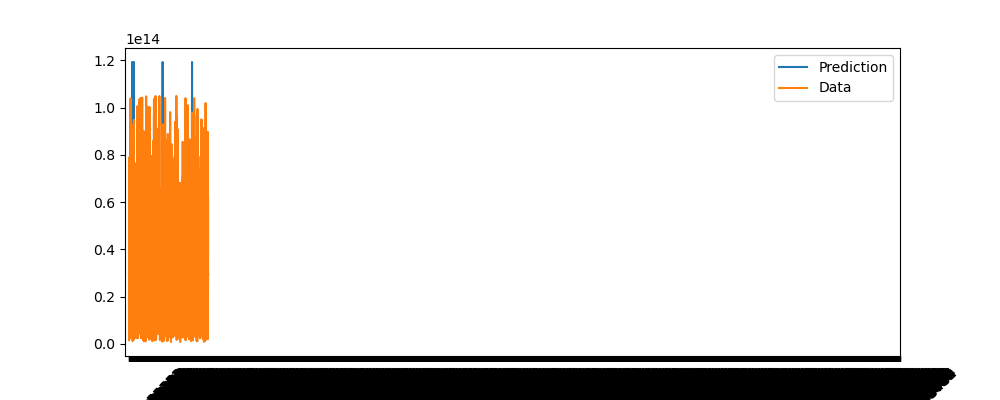

In [47]:
# And finally we can see that our network has done a decent job of estimating!
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(plot_pred, label='Prediction')
ax.plot(plot_actual, label='Data')
ax.set_xticks(np.arange(len(datesx)))
ax.set_xticklabels(datesx, rotation=45)
ax.legend()